<span class="notebook-slide-start"/>

# APIs do GitHub (v3)

Este notebook apresenta os seguintes tópicos:

- [APIs do GitHub](#APIs-do-GitHub) - APIs do GitHub
- [Autenticação](#Autenticacao) - Autenticação
- [API v3](#API-v3) - API v3
- [Exercício 6](#Exercicio-6) - Exercício 6
- [Exercício 7](#Exercicio-7) - Exercício 7
- [Exercício 8](#Exercicio-8) - Exercício 8

## APIs do GitHub

Como o GitHub oferece APIs para obter informações de repositórios, usá-las em geral é melhor do que fazer crawling.

O GitHub possui duas versões estáveis de APIs:

- REST API v3: https://developer.github.com/v3/
- GraphQL API v4: https://developer.github.com/v4/

A forma de usar cada API é diferente e a taxa de requisições permitidas também é. Neste minicurso, usaremos requests para acessar ambas as APIs, mas existem bibliotecas prontas (como a PyGitHub para a v3) que fazem o acesso.

### Autenticacao

Para usar qualquer uma das APIs, é necessário gerar um token de autenticação no GitHub seguindo os seguintes passos.

Primeiro, vá em configurações da conta.

![Página inicial do GitHub](images/github1.png)

Em seguida, abra configurações de desenvolvedor.

![Página de Configurações do Usuário](images/github2.png)

Abra "Personal access tokens" e clique em "Generate new token". 

![Página de Tokens de Acesso Pessoal](images/github3.png)


Escolha as permissões que você deseja no token. 

![Página de Criação de Token de Acesso Pessoal](images/github4.png)


Copie o token gerado para algum lugar seguro. Para o minicurso, eu copiei o meu token para `~/githubtoken.txt` e vou carregá-lo para a variável `token` a seguir. <span class="notebook-slide-extra" data-count="1"/>

In [1]:
from ipywidgets import FileUpload, interact
@interact(files=FileUpload())
def set_token(files={}):
    global token
    if files:
        for key, values in files.items():
            token = values['content'].decode("utf-8").strip()
            print("Token Loaded!")

interactive(children=(FileUpload(value={}, description='Upload'), Output()), _dom_classes=('widget-interact',)…

## API v3

Com o token em mãos, podemos começar a usa a API v3. O acesso a API do GitHub é feito a https://api.github.com. Portanto, precisamos mudar o site de nosso servidor de proxy. Para isso, podemos fechar e reiniciar da seguinte forma:

```bash
python proxy.py https://api.github.com/
```

Inicialmente, vamos fazer uma requisição para verificar se a autenticação funciona e para vermos nosso limite de requisições. <span class="notebook-slide-extra" data-count="1"/>

In [2]:
import requests 
SITE = "http://localhost:5000/" # ou https://api.github.com
def token_auth(request):
    request.headers["User-Agent"] = "Minicurso" # Necessário
    request.headers["Authorization"] = "token {}".format(token)
    return request
response = requests.get(SITE, auth=token_auth)
response.status_code

200

Resultado 200 - a autenticação funcionou. <span class="notebook-slide-scroll" data-position="-1"/>

O limite de acesso vem definido no header. <span class="notebook-slide-extra" data-count="3"/>

In [3]:
response.headers["X-RateLimit-Limit"]

'5000'

In [4]:
response.headers["X-RateLimit-Remaining"]

'4999'

In [5]:
response.headers["X-RateLimit-Reset"]

'1571985661'

O retorno da API v3 é sempre um JSON. O acesso a https://api.github.com retorna as URLS válidas da API. <span class="notebook-slide-extra" data-count="1"/>

In [6]:
import pdffallback
result = response.json()
pdffallback.show(result)

{'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'commit_search_url': 'https://api.github.com/search/commits?q={query}{&page,per_page,sort,order}',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'current_user_repositories_url': 'https://api.github.com/user/repos{?type,page,per_page,sort}',
...


Vamos ver o que a API tem sobre algum repositório.

Primeiro precisamos ver qual URL usar. <span class="notebook-slide-extra" data-count="1"/>

In [7]:
result['repository_url']

'https://api.github.com/repos/{owner}/{repo}'

Em seguida, fazemos a requisição para saber o que tem no repositorio `gems-uff/sapos`. <span class="notebook-slide-extra" data-count="2"/>

In [8]:
response = requests.get(SITE + "repos/gems-uff/sapos", auth=token_auth)
response.status_code

200

In [9]:
data = response.json()
pdffallback.show(data)

{'archive_url': 'https://api.github.com/repos/gems-uff/sapos/{archive_format}{/ref}',
 'archived': False,
 'assignees_url': 'https://api.github.com/repos/gems-uff/sapos/assignees{/user}',
 'blobs_url': 'https://api.github.com/repos/gems-uff/sapos/git/blobs{/sha}',
 'branches_url': 'https://api.github.com/repos/gems-uff/sapos/branches{/branch}',
...


O resultado tem diversos resultados e URLs para pegar mais informações. Vamos pegar algumas informações diretas interessantes. <span class="notebook-slide-extra" data-count="1"/>

In [10]:
print("Estrelas:", data["stargazers_count"])
print("Forks:", data["forks"])
print("Watchers:", data["subscribers_count"])
print("Issues abertas:", data["open_issues"])
print("Linguagem:", data["language"])

Estrelas: 18
Forks: 11
Watchers: 6
Issues abertas: 41
Linguagem: Ruby


Se quisermos saber quem são os colaboradores do projeto e quais são as issues existentes, podemos obter as respectivas URLs. <span class="notebook-slide-extra" data-count="1"/>

In [11]:
print("Colaboradores:", data["contributors_url"])
print("Issues:", data["issues_url"])

Colaboradores: https://api.github.com/repos/gems-uff/sapos/contributors
Issues: https://api.github.com/repos/gems-uff/sapos/issues{/number}


Agora podemos obter a lista de colaboradores. <span class="notebook-slide-extra" data-count="2"/>

In [12]:
response = requests.get(SITE + "repos/gems-uff/sapos/contributors", auth=token_auth)
response.status_code

200

In [13]:
data = response.json()
pdffallback.show(data, convert=True)

[{'avatar_url': 'https://avatars1.githubusercontent.com/u/327789?v=4',
  'contributions': 347,
  'events_url': 'https://api.github.com/users/JoaoFelipe/events{/privacy}',
  'followers_url': 'https://api.github.com/users/JoaoFelipe/followers',
  'following_url': 'https://api.github.com/users/JoaoFelipe/following{/other_user}',
...


### Gráfico de Barras

A partir desta lista, podemos fazer um gráfico de barras de contribuições. <span class="notebook-slide-extra" data-count="2"/>

In [14]:
contributions = {x["login"]: x["contributions"] for x in data}
contributions

{'JoaoFelipe': 347,
 'emoreth': 228,
 'bschettino': 216,
 'leomurta': 142,
 'tiagoamaro': 120,
 'Carlos-Eduardo-Cabral-da-Cunha': 113,
 'lvieirajr': 89,
 'braganholo': 69,
 'danielpcampagna': 32,
 'rdiasferreira': 24,
 'bernardocs': 7}

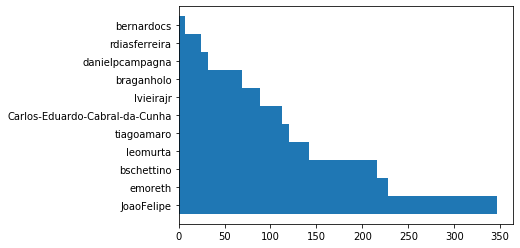

In [15]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
labels, values = zip(*contributions.items())
indexes = np.arange(len(labels))
width = 1
plt.barh(indexes, values, width)
plt.yticks(indexes, labels)
plt.show()

Nesse código:

- Importamos `matplotlib` e `numpy` para gerar o gráfico
- Chamamos `%matplotlib inline` para permitir a visualização da figura
- Separamos o dicionário `contributions` em duas listas de `labels` e `values`
- Criamos um `arange` de índices
- Criamos o gráfico de barras horizontal, usando `barh`
- Definimos os ticks de y como sendo os `labels` extraídos anteriormente

Podemos acessar também a url de issues. <span class="notebook-slide-extra" data-count="3"/>

In [16]:
response = requests.get(SITE + "repos/gems-uff/sapos/issues", auth=token_auth)
response.status_code

200

In [17]:
data = response.json()
pdffallback.show(data, convert=True)

[{'assignee': None,
  'assignees': [],
  'author_association': 'CONTRIBUTOR',
  'body': 'Deveria ser possível emitir um relatório com as prorrogações '
          'concedidas em um determinado mês, e o SAPOS não tem essa '
...


In [18]:
len(data)

30

Por padrão, a API retorna 30 itens por página. Dessa forma. a lista retornou apenas a primeira página de issues. <span class="notebook-slide-position" data-count="-1"/>

Podemos acessar a segunda página com o parâmetro `?page=2`. <span class="notebook-slide-extra" data-count="3"/>

In [19]:
response = requests.get(SITE + "repos/gems-uff/sapos/issues?page=2", auth=token_auth)
response.status_code

200

In [20]:
data2 = response.json()
pdffallback.show(data2, convert=True)

[{'assignee': {'avatar_url': 'https://avatars2.githubusercontent.com/u/7855757?v=4',
               'events_url': 'https://api.github.com/users/danielpcampagna/events{/privacy}',
               'followers_url': 'https://api.github.com/users/danielpcampagna/followers',
               'following_url': 'https://api.github.com/users/danielpcampagna/following{/other_user}',
               'gists_url': 'https://api.github.com/users/danielpcampagna/gists{/gist_id}',
...


In [21]:
len(data2)

11

Podemos formar uma lista com todas as issues abertas. <span class="notebook-slide-extra" data-count="1"/>

In [22]:
open_issues = data + data2

Essas são apenas as issues abertas. Para pegarmos as issues fechadas, precisamos definir `state=closed`. Podemos aproveitar e definir também `per_page=100` (limite máximo) e fazer um código para pegar todas as páginas. <span class="notebook-slide-extra" data-count="1"/>

In [23]:
should_continue = True
page = 1
closed_issues = []
while should_continue:
    response = requests.get(SITE + "repos/gems-uff/sapos/issues?page={}&per_page=100&state=closed".format(page), auth=token_auth)
    if response.status_code != 200:
        print("Fail:", response.status_code)
        break
    data = response.json()
    closed_issues += data
    if len(data) < 100:
        should_continue = False
    page += 1
len(closed_issues), page - 1

(262, 3)

Foram encontradas 262 issues em 3 páginas. <span class="notebook-slide-scroll" data-position="-1"/>

Agora podemos fazer um gráfico que mostre a evolução de issues abertas ao longo do tempo. 

Para fazer esse gráfico, primeiro precisamos combinar as issues e descobrir qual foi a data da issue mais antiga. <span class="notebook-slide-extra" data-count="1"/>

In [24]:
import dateutil.parser

all_issues = open_issues + closed_issues
oldest_issue = min(
    all_issues, 
    key=lambda x: dateutil.parser.parse(x["created_at"])
)

oldest_date = dateutil.parser.parse(oldest_issue["created_at"])
oldest_date

datetime.datetime(2013, 6, 29, 15, 23, 48, tzinfo=tzutc())

A partir desta data, podemos criar um range de dias até hoje para ser o nosso índice do gráfico e um array de zeros do `numpy` para acumularmos a quantidade de issues abertas. <span class="notebook-slide-extra" data-count="1"/>

In [25]:
from datetime import datetime, timezone
today = datetime.now(timezone.utc)
delta = today - oldest_date
days = delta.days
print(days)
indexes = np.arange(days)
values = np.zeros(days)

2310


Podemos percorrer todas as issues abertas, incrementando `values` do período em que elas foram abertas até hoje. E podemos percorrer todas as issues fechadas incrementando `values` do período em que elas foram abertas até o período em que elas foram fechadas. <span class="notebook-slide-extra" data-count="1"/>

In [26]:
for issue in open_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    values[created_at_index:] += 1
    
for issue in closed_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    
    closed_at = dateutil.parser.parse(issue["closed_at"])
    closed_at_index = (closed_at - oldest_date).days
    values[created_at_index:closed_at_index] += 1

Já é possível plotar o gráfico desta forma, mas o entendimento dos eixos ainda não é o ideal. <span class="notebook-slide-extra" data-count="1"/>

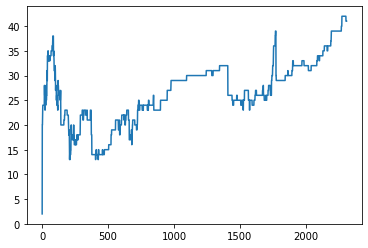

In [27]:
plt.plot(indexes, values)

Precisamos definir quais são os anos no eixo x. <span class="notebook-slide-extra" data-count="1"/>

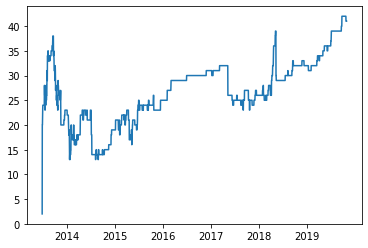

In [28]:
from math import ceil
labels = [datetime(2013 + i, 1, 1, tzinfo=timezone.utc) for i in range(ceil(delta.days / 365))]
label_indexes = [(label - oldest_date).days for label in labels]
label_years = [label.year for label in labels]
plt.xticks(label_indexes, label_years)
plt.plot(indexes, values)
plt.show()

Também podemos definir o que é cada eixo. <span class="notebook-slide-extra" data-count="1"/>

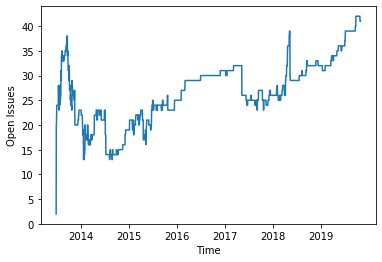

In [29]:
plt.xticks(label_indexes, label_years)
plt.xlabel("Time")
plt.ylabel("Open Issues")
plt.plot(indexes, values)
plt.show()

Issues podem ter diversos labels. Agora vamos fazer um gráfico que mostre barras estacadas com a evolução de cada tipo de issue. <span class="notebook-slide-extra" data-count="1"/>

In [30]:
from collections import defaultdict
values = defaultdict(lambda: np.zeros(days))

for issue in open_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    for label in issue["labels"]:
        values[label["name"]][created_at_index:] += 1
    if not issue["labels"]:
        values["no-label"][created_at_index:] += 1
        
for issue in closed_issues:
    created_at = dateutil.parser.parse(issue["created_at"])
    created_at_index = (created_at - oldest_date).days
    
    closed_at = dateutil.parser.parse(issue["closed_at"])
    closed_at_index = (closed_at - oldest_date).days
    for label in issue["labels"]:
        values[label["name"]][created_at_index:closed_at_index] += 1
    if not issue["labels"]:
        values["no-label"][created_at_index:closed_at_index] += 1
        


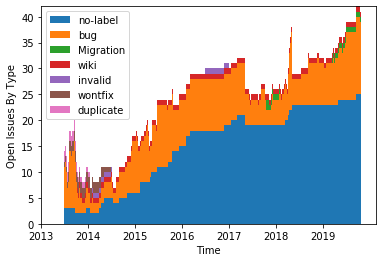

In [31]:
bottom = np.zeros(days)
legend_color = []
legend_text = []
for label, yvalues in values.items():
    if not label[0].isdigit(): # Exclui tags de versões
        ax = plt.bar(indexes, yvalues, 1,
                     bottom=bottom)
        legend_color.append(ax[0])
        bottom += yvalues
        legend_text.append(label)
        
plt.xticks(label_indexes, label_years)
plt.xlabel("Time")
plt.ylabel("Open Issues By Type")
plt.legend(legend_color, legend_text)
plt.show()

## Exercicio 6

Crie um gráfico de linhas que mostre apenas issues do tipo bug. <span class="notebook-slide-extra" data-count="1"/>

In [ ]:
...

plt.xlabel("Time")
plt.ylabel("Open Bug Issues")
plt.show()

## Exercicio 7

Crie um gráfico de barras para mostrar a participação de usuários em cada issue. Considere o atributo `user`. <span class="notebook-slide-extra" data-count="2"/>

In [ ]:
...

In [ ]:
...

plt.xlabel("Time")
plt.ylabel("Open Issues By User")
plt.legend(
    legend_color, legend_text,
    bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",
    mode="expand", borderaxespad=0, ncol=2
)
plt.show()

## Exercicio 8

Filtre o gráfico do total de issues abertas para mostrar apenas o ano 2014. <span class="notebook-slide-extra" data-count="2"/>

In [ ]:
yfirst = datetime(2014, 1, 1, tzinfo=timezone.utc)
ylast = datetime(2015, 1, 1, tzinfo=timezone.utc)

deltadays = (ylast - yfirst).days
values = np.zeros(deltadays)
indexes = np.arange(deltadays)

...

In [ ]:
labels = [datetime(2014, i + 1, 1, tzinfo=timezone.utc) for i in range(12)]
label_indexes = [(label - yfirst).days for label in labels]
label_years = [label.month for label in labels]
plt.xticks(label_indexes, label_years)
plt.plot(indexes, values)
plt.show()

Continua: [7.API.v4.pdf](7.API.v4.pdf)